# 선형회귀

일반적으로 선형 모델은 입력 특성의 가중치 합과 편향(절편)이라는 상수를 더해 예측을 만든다.
모델을 훈련시킨다는 것은 모델이 훈련세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다.
이를 위해서는 모델이 훈련세트에 얼마나 잘 들어맞는지 측정해야한다.
회귀에 가장 널리 사용되는 성능 측정 지표는 평균 제곱근 오차 (RMSE) 이다.
따라서 선형 회귀 모델을 훈련시키려면 RMSE를 최소화 하는 가중치를 찾아야 한다.
실제로는 RMSE 보다 MSE를 최소화하는 것이 같은 결과를 내면서 더 간단하다.

# 정규방정식

cost 함수를 최소화하는 가중치 값을 찾기 위한 해석적인 방법이 있다.
다른 말로 하면 바로 결과를 얻을 수 있는 수학 공식이 있다.
이를 정규방정식(Normal Equation)이라고 한다

In [1]:
# 임의의 데이터셋 생성
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
# 생성된 데이터셋 확인
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.title("Random DataSet")
plt.xlabel("x")
plt.ylabel("y")

Text(0,0.5,'y')

In [3]:
### 정규방정식을 사용해 가중치를 계산
##### - 넘파이 선형대수 모듈(np.linalg)에 있는 inv() 함수를 사용해 역행렬을 계산하고,
##### - dot() 메서드를 사용해 행렬곱셈 실시

# 배치 경사 하강법 (Batch Gradient Descent)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # 각각의 인스턴스에 x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
#학습률
eta = 0.1

#반복 횟수
n_iterations = 1000

#입력받는 특징수
m = 100

# 파라미터 값
theta = np.random.randn(2,1)

#정해준 반복횟수 만큼 배치경사하강법 수행하기
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

# 계산된 theta 확인
theta

array([[4.15178212],
       [2.97202615]])

# 확률적 경사 하강법 (Stochastic gradient descent:SGD)

In [7]:
# 사이킷런으로 구현
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([4.14657766]), array([2.97414541]))

# 다항회귀 (Polynomial Regression)

In [8]:
# 2차방정식 비선형 데이터셋 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

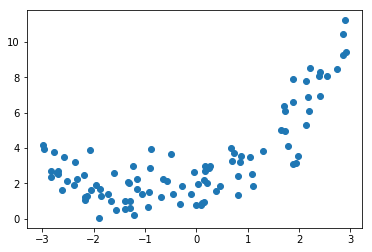

In [9]:
# 데이터셋 확인
plt.scatter(X,y)

In [10]:
# 사이킷런의 PolynomialFeatures를 사용해 훈련 데이터를 변환
# 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("X[0] 값 : {}".format(X[0]))
print("X_poly[0] 값 : {}".format(X_poly[0]))

X[0] 값 : [0.24507119]
X_poly[0] 값 : [0.24507119 0.06005989]


In [11]:
# X_poly는 원래 특성 X와 이 특성의 제곱을 포함
# 여기에 Linear Regression을 적용
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.82839546]), array([[1.06320039, 0.5417911 ]]))

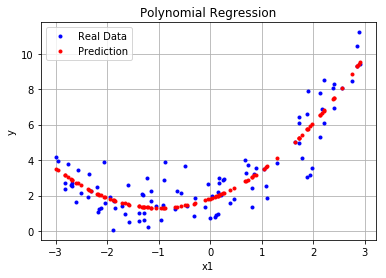

In [12]:
# 예측 그래프 확인
plt.plot(X,y,"b.", label="Real Data")
plt.plot(X,lin_reg.predict(X_poly), "r.", label="Prediction")
plt.title("Polynomial Regression")
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# 학습 곡선 (Learning Curves)

 만약 높은 차수의 다항 회귀 모델을 사용하고 있다면, 평평한 선형 회귀 모델 보다 좀 더 학습 데이터를 잘 학습하는 경향이 있다는 것을 알게될 것이다. 예를들어, 아래의 그림은 순수한 선형 모델과 이차방정식 모델, 그리고 300차수의 다항식 모델에 대한 결과를 보여준다.
 
 당연히 높은 차수의 다항 회귀 모델은 일부 학습 데이터에서 과하게 학습된(Overfitting) 반면에 선형회귀모델은 덜 학습된(Underfitting) 것을 볼 수 있다. 이차방정식 모델이 최적으로 학습이 되었다. 그렇지만 일반적으로 함수가 생성한 데이터는 모를 것이다. 그럼 우리의 학습 모델은 얼마나 복잡한 것일까? 어떻게 함수가 과하게 혹은 덜 학습되었다고 볼 수 있을까?

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

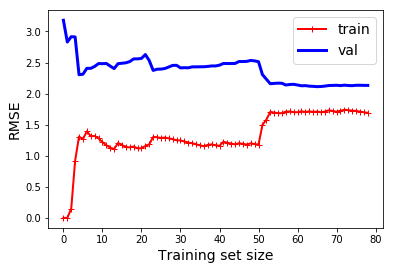

In [14]:
# 선형회귀모델의 학습곡선
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

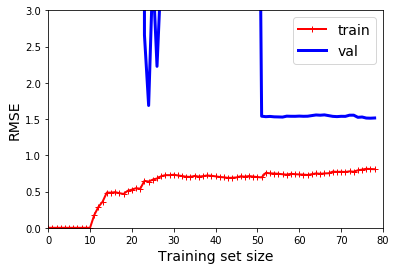

In [15]:
# 10차 다항식의 학습곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

# 릿지 회귀 (Ridge Regression)

 릿지 회귀는 규제가 추가된 선형 회귀이다. 규제항이 cost 함수에 추가됨으로써 학습 알고리즘을 데이터에 마주는 것 뿐만 아니라 모델의 가중치가 가능한 작게 유지된다 규제항은 훈련하는 동안에만 cost 함수에 추가되며, 훈련이 끝나면 모델의 성능은 규제가 없는 성능 지표로 평가한다.

하이퍼 파라미터 α는 얼마나 모델을 정형화 할 것인지 컨트롤해준다. α=0이면 리지 회귀 모델은 일반적인 선형 회귀모델이 되는 것이다. 만약 α가 너무 크다면, 모든 가중치 값들은 결국엔 0으로 가게될 것이고, 데이터 평균을 경험하는 평평한 선이 될 것이다. 아래의 수학 공식은 리지 회귀모델 손실 함수를 나타내는 것이다.

편향치 θ0는 정형화되지 않는다. w를 θ1부터 θn까지 특징값의 가중치 벡터로 정의하면, 정형화 식은 1/2(||w||2)^2가 될 것이며, || . ||2는 가중치 벡터의 정규값을 나타낸다. 경사 하강법에 대해서는 αw를 MSE 기울기 함수에 더하게된다.

아래의 그림은 다양한 α값을 사용하여 일부 선형 데이터에 대하여 학습된 리지 회귀 모델을 보여준다. 왼쪽에는 선형 예측으로 유도한 평평한 리지 회귀 모델이 사용된 것이고, 오른쪽에는, 데이터가 PolynomialFeature(degree=10)를 사용하여 확장시키고, StandardScaler로 스케일을 조정한 뒤에, 이렇게 처리된 특징들로 리지 모델에 적용시킨다. 이것이 리지 정형화로 만든 다항 회귀 모델이다.

선형 모델에서는 경사 하강법을 사용하거나 폐쇄형태의 공식을 사용해서 리지 회귀를 수행할 수 있다. 장점과 단점은 같으며 아래의 공식예 폐쇄적인 형태의 솔루션을 보여주고 있다.

In [16]:
# sklearn을 통한 정규방정식을 사용한 릿지회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.94728276]])

In [17]:
# 확률적 경사 하강법을 사용한 릿지 회귀
sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([3.97851595])

Penalty라는 하이퍼 파라미터는 사용하려는 정형화 식의 종류를 설정해준다. "l2"를 쓰게되면 SGD에 가중치 벡터의 정규값의 제공을 반으로 나눈 것과 같이 손실함수에 정형화 식을 추가하라고 하는 것이다.

# 라쏘 회귀 (Lasso Regression)

 라쏘 회귀는 선형 회귀의 또 다른 규제된 버전이다. 릿지 처럼 cost 함수에 규제항을 더하지만 다른 규제항을 더하는 것이다.
    
 역시 α에 따라 규제 정도가 달라진다.
    
 릿지 회귀는 가중치가 0 에 가까워질 뿐 실제로 0이 되지는 않는다. 그러나 라쏘 회귀의 가장 중요한 특징은 덜 중요한 가중치를 완전히 제거시킨다. 즉 가중치가 0이 될 수도 있다. 오른쪽 그래프는 α가 1e-07 일 때 2차 다항식처럼 되었다. 즉 원래 10차 다항식이지만 차수가 높은 가중치들이 모두 0이 된 것이다. 즉 라쏘 회귀는 자동으로 특성 선택을 하여 희소 모델을 만든다.

In [18]:
# 사이킷런으로 구현
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.89654296])

# 엘라스틱넷 (Elastic Net)

 엘라스틱넷은 릿지와 라쏘를 절충한 모델이다. 규제항의 경우 릿지와 라쏘의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합비율 r을 사용해 조절한다. r=0 이면 엘라스틱넷은 릿지 회귀와 같고, r=1 이면 라쏘 회귀와 같다. 

 보통 선형 회귀, 릿지, 라쏘, 엘라스틱넷을 언제 사용할까? 일반적으로 규제가 어느정도 존재하는 것이 좋은 성능을 나타낸다.
따라서 릿지회귀를 기본적으로 사용하되, 실제로 쓸만한 특성이 적을 것으로 생각되면 라쏘나 엘라스틱넷을 사용하는 것이 바람직하다.
또한 특성 수가 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘보다는 엘라스틱넷을 사용한다.

In [19]:
# 사이킷런으로 엘라스틱넷 구현
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.8977335])

# 조기 종료 (early stopping)

경사 하강법처럼 반복적인 학습 알고리즘을 규제하는 또 다른 방법은 검증 에러가 최솟값에 도달하면 훈련을 중지시키는 것이다. 이를 조기 종료라고한다.